# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [99]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [184]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("pk.eyJ1IjoiZmF6bGVoYW1lZW0iLCJhIjoiY2tneTdreWV4MGIyZTJ1bXNtd3E4dTNwZCJ9.V-zQBku8Dcjlk14FBqxPUg")

## Load Data

In [78]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [79]:
load_data = (sfo_data[["year", "housing_units"]])
load_data

,year,housing_units
0,2010,372560
1,2010,372560
2,2010,372560
3,2010,372560
4,2010,372560
5,2010,372560
6,2010,372560
7,2010,372560
8,2010,372560
9,2010,372560


In [80]:
# Calculate the mean number of housing units per year (hint: use groupby) 
load_data1 = (load_data.groupby("year")).mean()
load_data1

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [81]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

load_data1.hvplot.bar(x='year', y = 'housing_units', rot=90, ylim =(370000, 387500)).opts(yformatter="%.0f")

:Bars   [year]   (housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [82]:
# Calculate the average gross rent and average sale price per square foot
load_data2 = (sfo_data[["year", "sale_price_sqr_foot", "gross_rent"]]).groupby("year").mean()
load_data2

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [83]:
# Plot the Average Gross Rent per Year as a Line Chart 
load_data2.hvplot(x = 'year', y = 'gross_rent', label = 'Average Gross Rent in San Francisco')

:Curve   [year]   (gross_rent)

### Average Sales Price per Year

In [84]:
# Plot the Average Sales Price per Year as a line chart
load_data2.hvplot(x = 'year', y = 'sale_price_sqr_foot', label = 'Average Sale Price per Square Foot in San Francisco')

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [85]:
# Group by year and neighborhood and then create a new dataframe of the mean values
load_data3 = sfo_data.groupby(['year', 'neighborhood']).mean()
load_data3.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [86]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
load_data3.hvplot(x = 'year', y = 'sale_price_sqr_foot', groupby ='neighborhood', kind='line') 

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [91]:
# Getting the data from the top 10 expensive neighborhoods
load_data4 = load_data3.sort_values(by ='sale_price_sqr_foot', ascending = False).head(10)
load_data4

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                             
2015 Union Square District              2258.702832         382295        3739
2016 Presidio Heights                   1465.968586         384242        4390
     Merced Heights                     1416.666667         384242        4390
2013 Union Square District              1290.472107         378401        2971
2014 Miraloma Park                      1267.766203         380348        3528
2016 Parnassus/Ashbury Heights          1207.997485         384242        4390
     Outer Richmond                     1196.645437         384242        4390
2015 Marina                             1132.837361         382295        3739
2014 South of Market                    1119.838877         380348        3528
2015 Corona Heights                     1100.791194         382295        3739

In [96]:
# Plotting the data from the top 10 expensive neighborhoods
load_data4.hvplot.bar(x = 'neighborhood', y = 'sale_price_sqr_foot')

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [125]:
df =load_data4.groupby("year").head()
df

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                             
2015 Union Square District              2258.702832         382295        3739
2016 Presidio Heights                   1465.968586         384242        4390
     Merced Heights                     1416.666667         384242        4390
2013 Union Square District              1290.472107         378401        2971
2014 Miraloma Park                      1267.766203         380348        3528
2016 Parnassus/Ashbury Heights          1207.997485         384242        4390
     Outer Richmond                     1196.645437         384242        4390
2015 Marina                             1132.837361         382295        3739
2014 South of Market                    1119.838877         380348        3528
2015 Corona Heights                     1100.791194         382295        3739

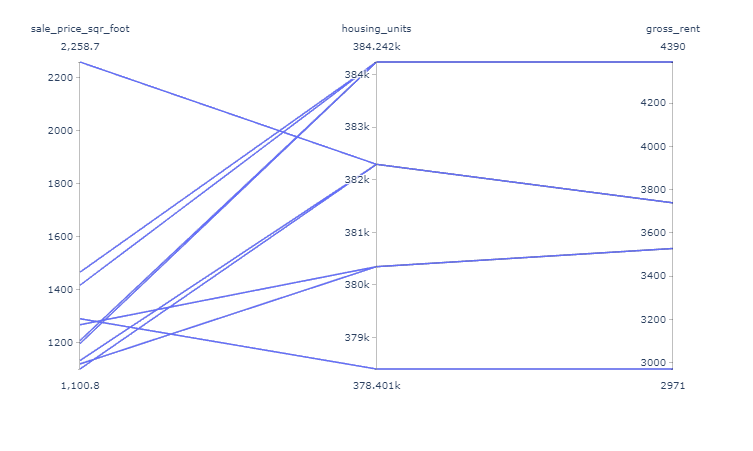

In [128]:
# Parallel Coordinates Plot
px.parallel_coordinates(load_data4)

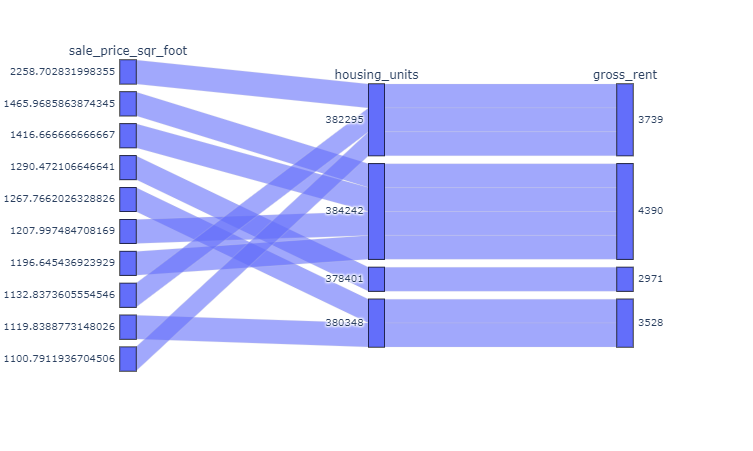

In [130]:
# Parallel Categories Plot
px.parallel_categories(load_data4, color_continuous_scale=px.colors.sequential.Inferno)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [174]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
dn =df_neighborhood_locations.rename(columns={'Neighborhood': 'neighborhood'}).groupby("neighborhood").sum()

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [175]:
# Calculate the mean values for each neighborhood
ds = (sfo_data[[ "year","sale_price_sqr_foot", "gross_rent", "housing_units", "neighborhood"]]).groupby("neighborhood").mean()
ds

,year,sale_price_sqr_foot,gross_rent,housing_units
neighborhood,,,,
Alamo Square,2013.000000,366.020712,2817.285714,378401.00
Anza Vista,2013.333333,373.382198,3031.833333,379050.00
Bayview,2012.000000,204.588623,2318.400000,376454.00
Bayview Heights,2015.000000,590.792839,3739.000000,382295.00
Bernal Heights,2013.500000,576.746488,3080.333333,379374.50
Buena Vista Park,2012.833333,452.680591,2698.833333,378076.50
Central Richmond,2013.000000,394.422399,2817.285714,378401.00
Central Sunset,2013.000000,423.687928,2817.285714,378401.00
Clarendon Heights,2012.000000,487.244886,2250.500000,376454.00


In [176]:
# Join the average values with the neighborhood locations
dl = ds.join(dn)
dl

,year,sale_price_sqr_foot,gross_rent,housing_units,Lat,Lon
neighborhood,,,,,,
Alamo Square,2013.000000,366.020712,2817.285714,378401.00,37.791012,-122.402100
Anza Vista,2013.333333,373.382198,3031.833333,379050.00,37.779598,-122.443451
Bayview,2012.000000,204.588623,2318.400000,376454.00,37.734670,-122.401060
Bayview Heights,2015.000000,590.792839,3739.000000,382295.00,37.728740,-122.410980
Bernal Heights,2013.500000,576.746488,3080.333333,379374.50,NaN,NaN
Buena Vista Park,2012.833333,452.680591,2698.833333,378076.50,37.768160,-122.439330
Central Richmond,2013.000000,394.422399,2817.285714,378401.00,37.777890,-122.445170
Central Sunset,2013.000000,423.687928,2817.285714,378401.00,37.749610,-122.489990
Clarendon Heights,2012.000000,487.244886,2250.500000,376454.00,37.753310,-122.447030


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [194]:
token = 'pk.eyJ1IjoiZmF6bGVoYW1lZW0iLCJhIjoiY2tneTdreWV4MGIyZTJ1bXNtd3E4dTNwZCJ9.V-zQBku8Dcjlk14FBqxPUg'
px.set_mapbox_access_token(token)

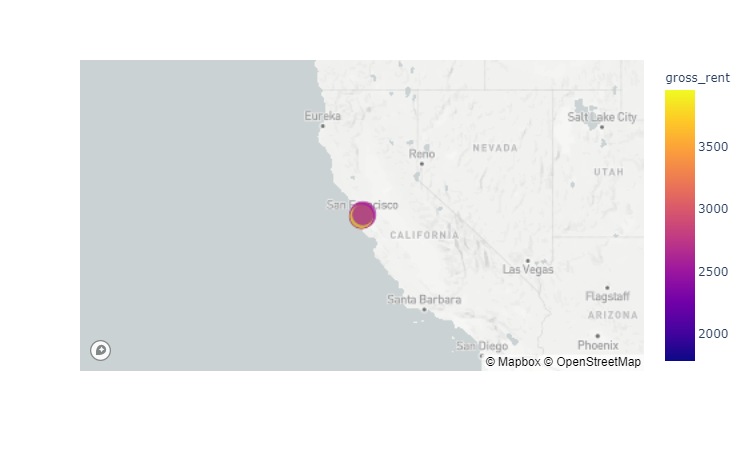

In [195]:
# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(dl, color ="gross_rent",lat = "Lat", lon = "Lon", size = "sale_price_sqr_foot", zoom=4)
map_plot.show()